#Libraries and data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 1.8 MB 9.3 MB/s 
     |████████████████████████████████| 9.8 MB 3.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [9]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/4. TBATS

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/4. TBATS


In [7]:
import pandas as pd

In [10]:
df = pd.read_csv("daily-footfall.csv", 
                 index_col="WeekBeginning")
df.head()

,AveragePerDay
WeekBeginning,
3/1/2016,235
10/1/2016,231
17/01/2016,233
24/01/2016,224
31/01/2016,224


In [11]:
df.index = pd.to_datetime(df.index, 
                          format = "%d/%m/%Y")
df.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=103, freq=None)

In [12]:
df = df.asfreq("W-SUN")
df.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=104, freq='W-SUN')

#Visualization

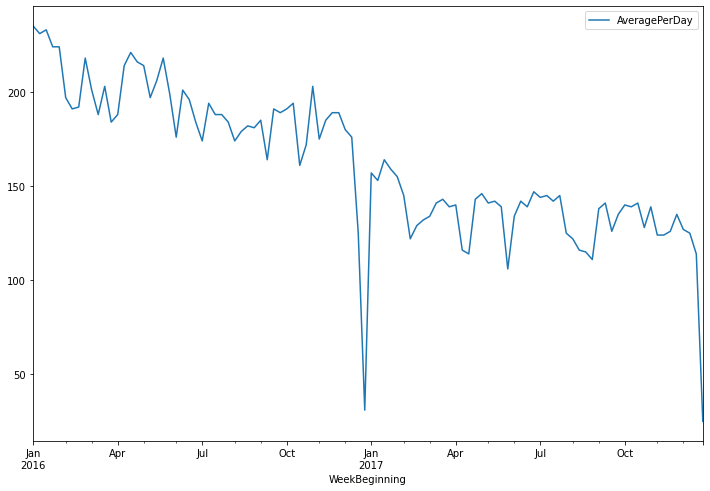

In [15]:
#Visualization
df.plot(figsize = (12,8))

In [14]:
df = df.fillna(method='ffill')

In [16]:
#training and test set
test_days = 5
training_set = df.iloc[:-test_days,:]
test_set = df.iloc[-test_days:,:]
training_set.head()

,AveragePerDay
WeekBeginning,
2016-01-03,235.0
2016-01-10,231.0
2016-01-17,233.0
2016-01-24,224.0
2016-01-31,224.0


In [17]:
#TBATS
from tbats import TBATS
model = TBATS(
    seasonal_periods=[52]).fit(
    training_set.AveragePerDay)

In [18]:
#predictions
predictions_tbats = pd.Series(
    model.forecast(len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

WeekBeginning
2017-11-26    142.421047
2017-12-03    149.637739
2017-12-10    111.377062
2017-12-17     51.804944
2017-12-24     39.879864
Freq: W-SUN, Name: TBATS, dtype: float64

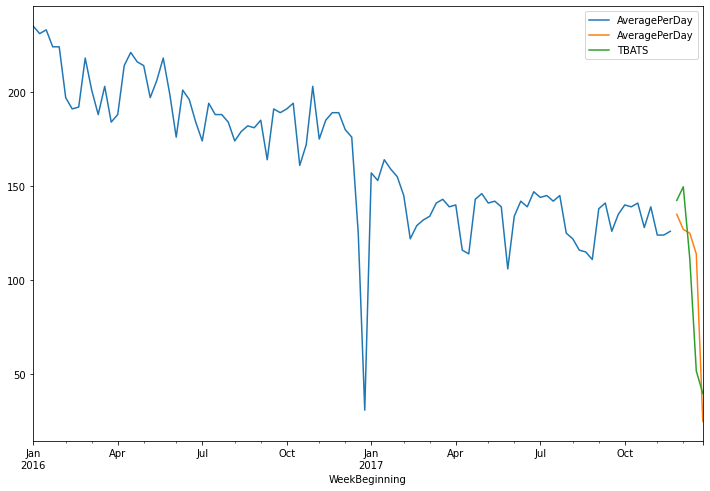

In [19]:
#plotting
training_set.AveragePerDay.plot(figsize=(12,8), 
                                legend = True)
test_set.AveragePerDay.plot(legend = True)
predictions_tbats.plot(legend = True)

In [23]:
#accuracy assessment
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(test_set['AveragePerDay'], 
                           predictions_tbats))

31.121564747340965